<a href="https://colab.research.google.com/github/Diptanil-Chakraborty/ENVIRONMENT_ENGINEERING/blob/main/Quality_of_Water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("/content/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<Axes: >

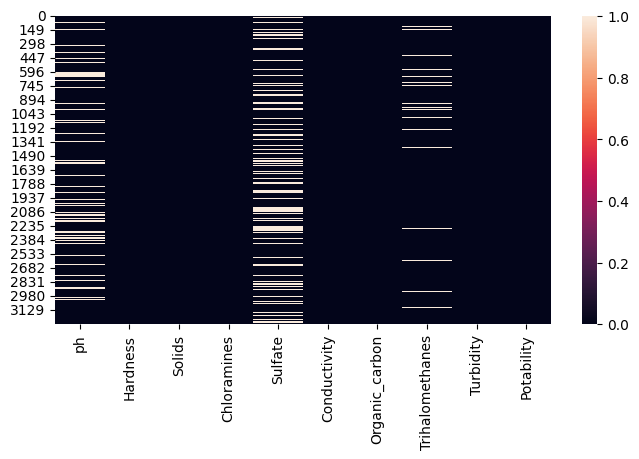

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull())

<Axes: >

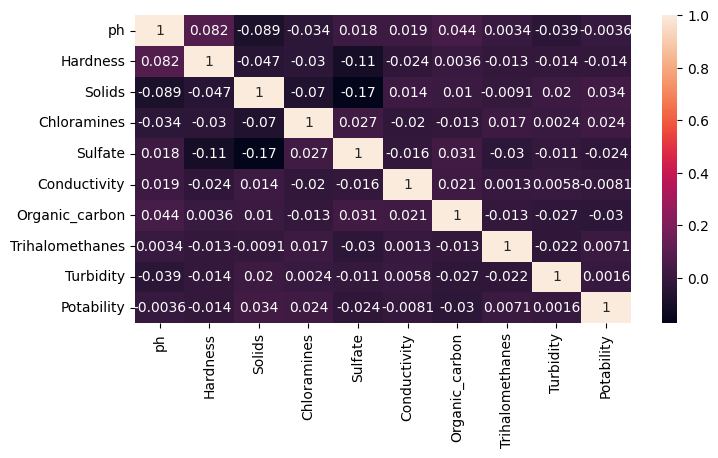

In [ ]:
plt.figure(figsize= (8,4))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Potability', ylabel='count'>

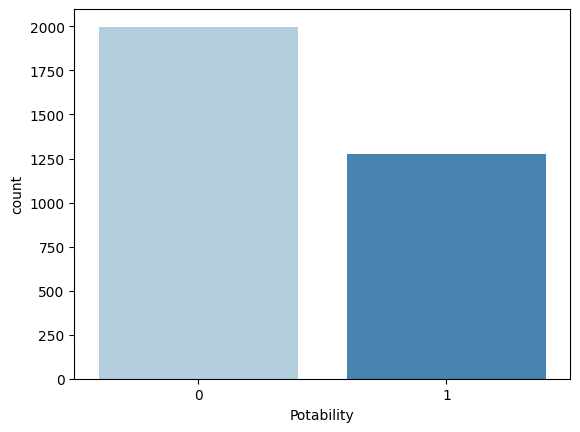

In [ ]:
sns.countplot(x="Potability",data=df,palette='Blues')



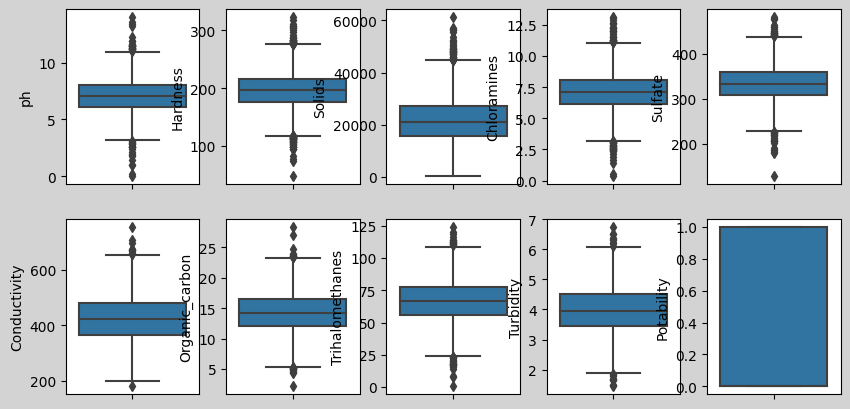

In [ ]:


fig, ax = plt.subplots(ncols=5, nrows=2, figsize = (10,5))

ax = ax.flatten()

index = 0

for col,values in df.items():
  sns.boxplot(y=col,data=df,ax=ax[index])

  index +=1
  fig.set_facecolor("lightgrey")

Text(0.9, 0.9, 'Correlation')

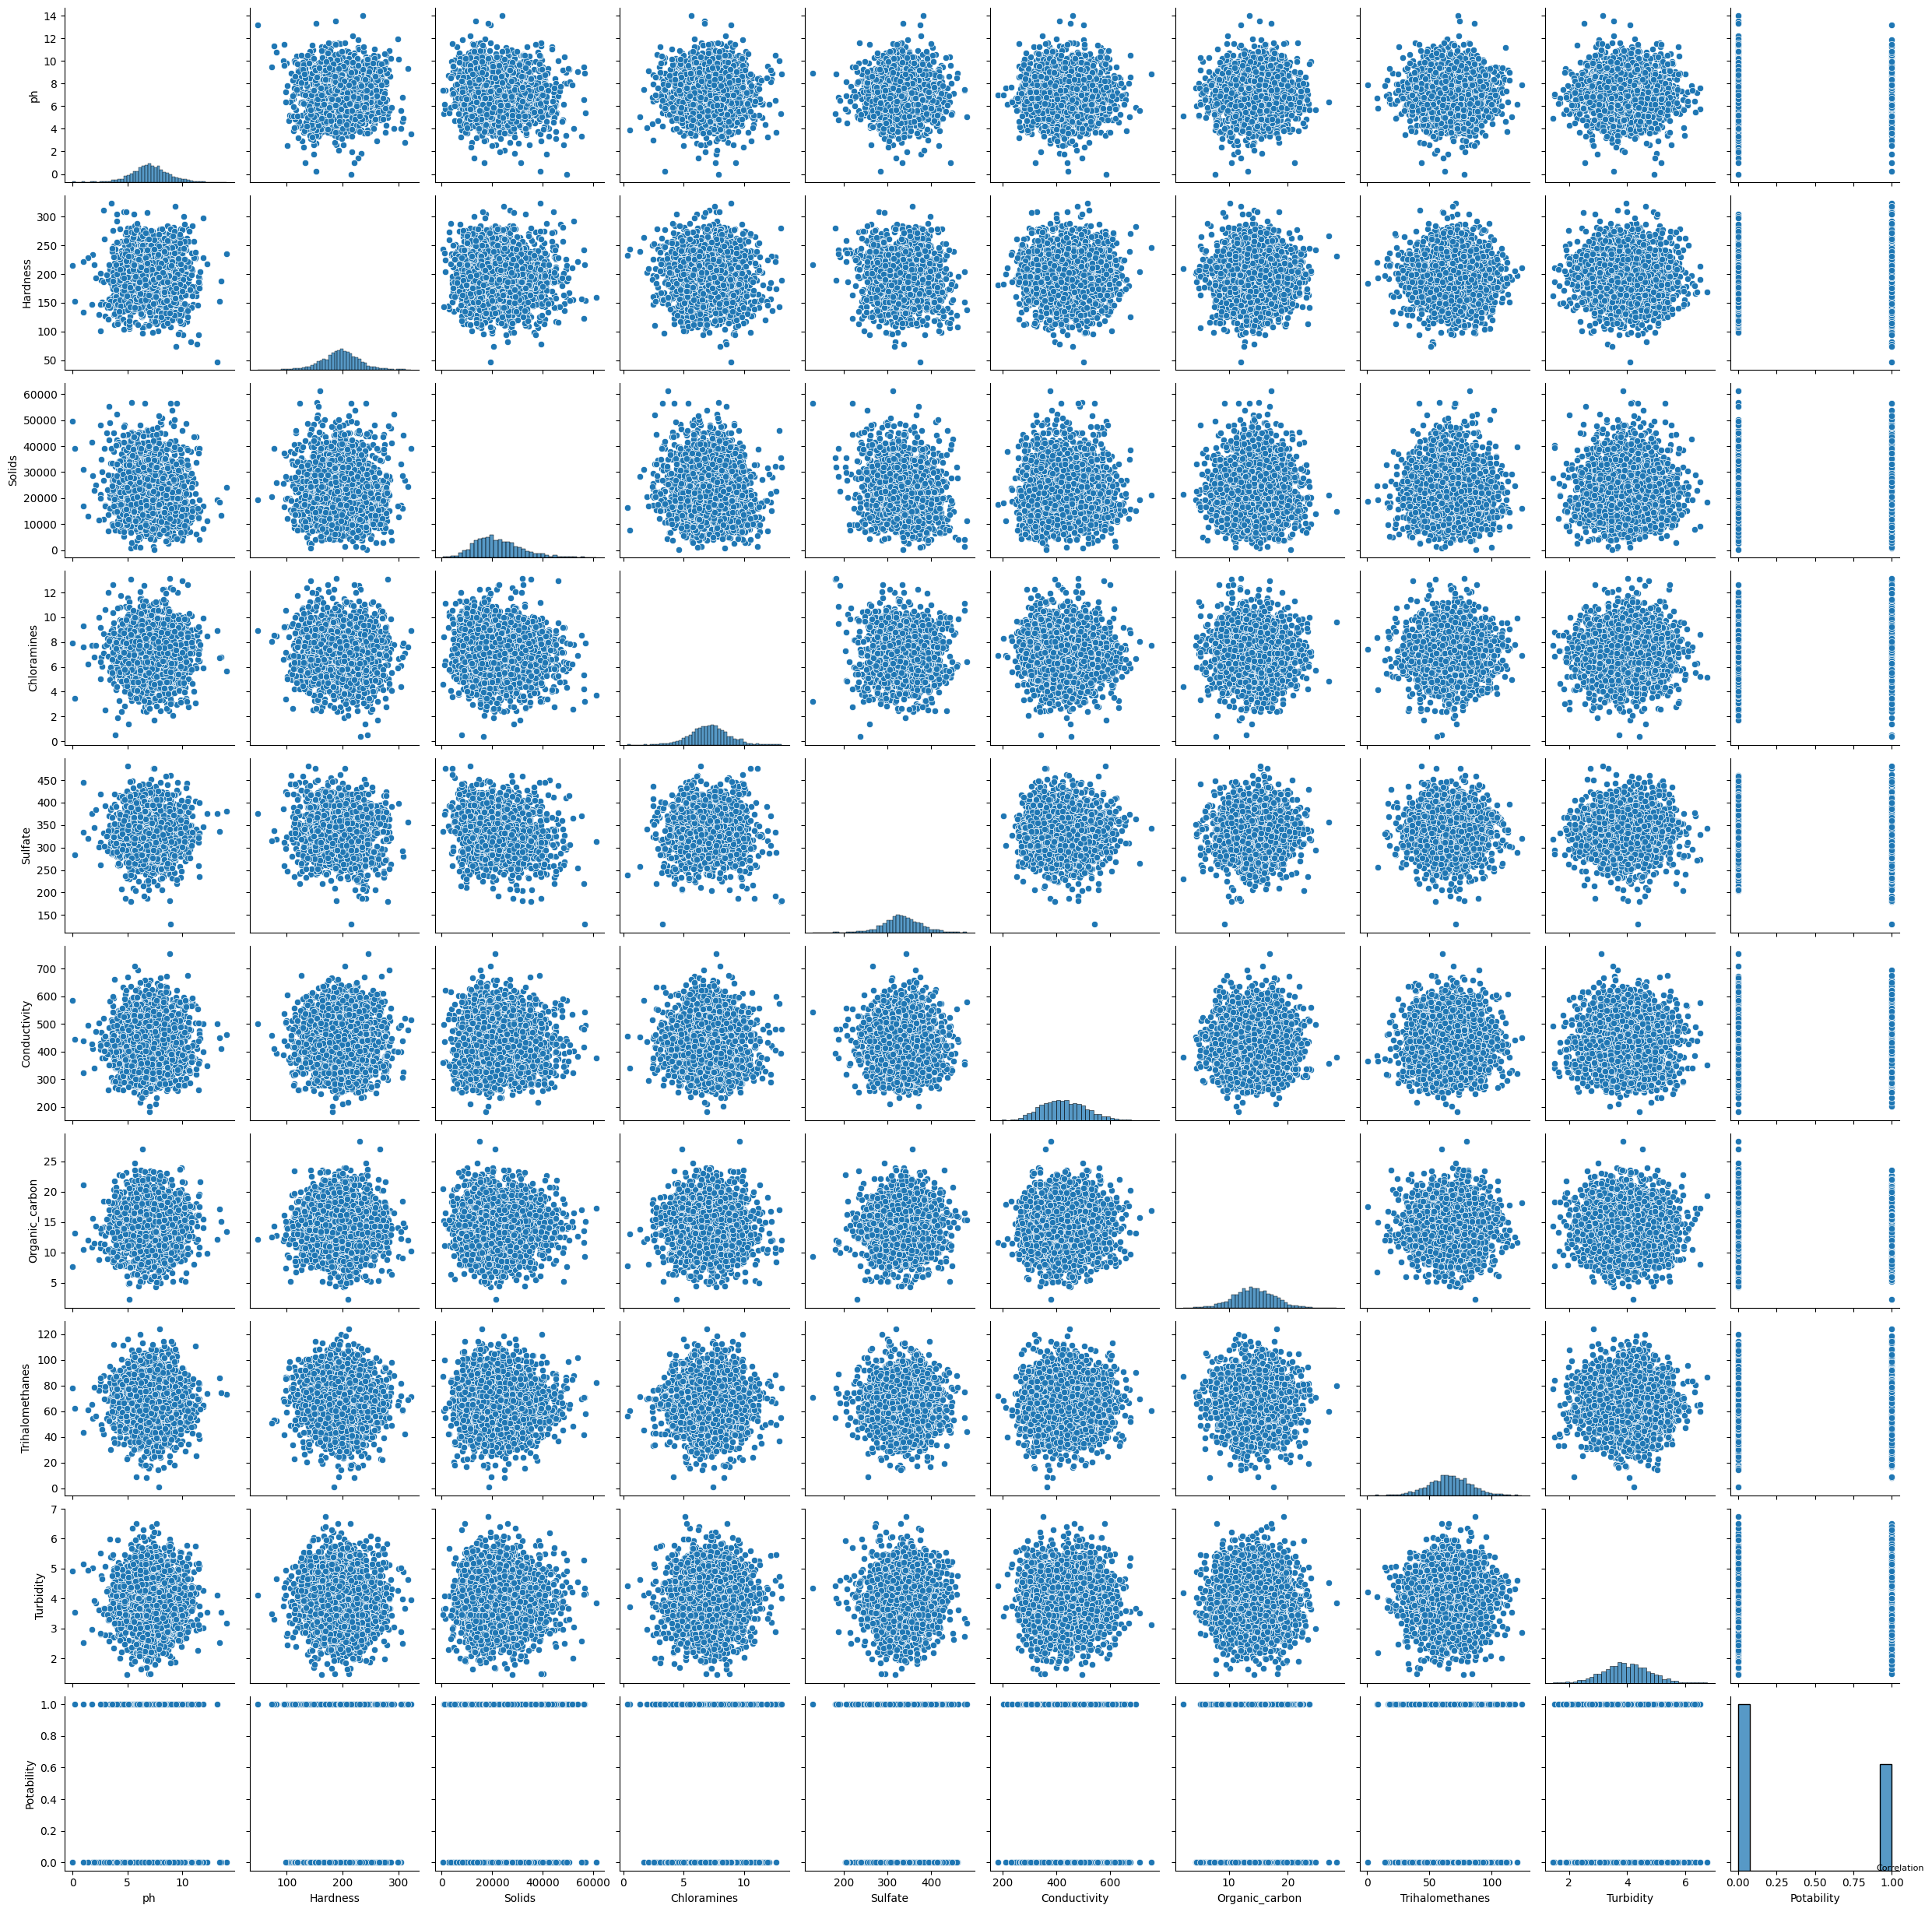

In [ ]:
sns.pairplot(df)
plt.annotate("Correlation", (0.9, 0.9), color="black", size=8)





In [ ]:
fig = px.pie(df,names = "Potability",hole = 0.4,template ="plotly_dark")

fig.update_layout(plot_bgcolor="lightgray")
fig.show()

In [ ]:
fig = px.scatter(df,x = "ph",y="Sulfate",color = "Potability",template= "plotly_dark")
fig.show()

In [ ]:
fig = px.scatter(df,x = "Organic_carbon",y="Hardness",color = "Potability",template= "plotly_dark")
fig.show()

Text(0, 0.5, 'Percentage of missing values')

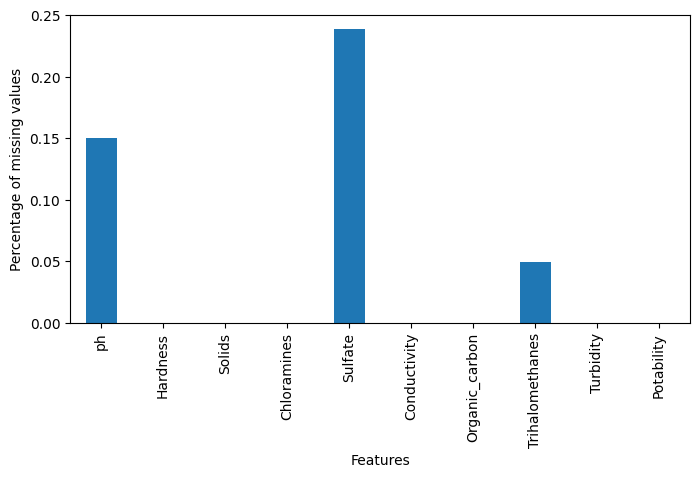

In [ ]:
df.isnull().mean().plot.bar(figsize = (8,4))
plt.xlabel("Features")
plt.ylabel("Percentage of missing values")

In [ ]:
df["ph"] = df["ph"].fillna(df["ph"].mean())
df["Sulfate"] = df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

<Axes: >

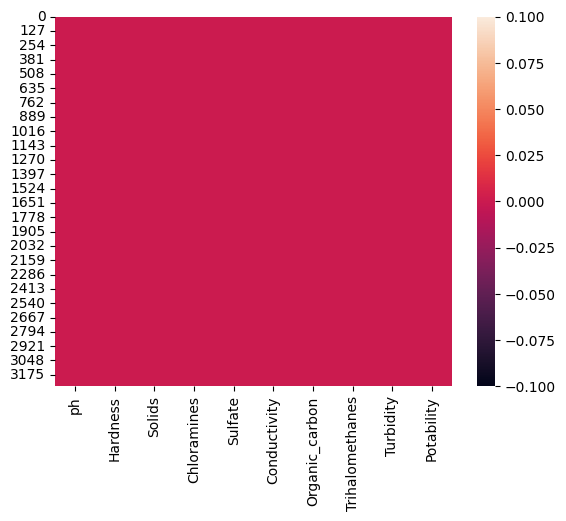

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
x = df.drop("Potability",axis=1)
y = df["Potability"]

In [ ]:
x.shape , y.shape

((3276, 9), (3276,))

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape , x_test.shape

((2620, 9), (656, 9))

Logistic Regression

In [ ]:

from sklearn.linear_model import LogisticRegression

#object of LR
model_lr = LogisticRegression()

In [ ]:

model_lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:

pred_lr = model_lr.predict(x_test)

In [ ]:

accuracy_score_lr = accuracy_score(y_test,pred_lr)
accuracy_score_lr*100

61.737804878048784

Decision Tree Classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier


model_dt = DecisionTreeClassifier(max_depth = 4)

In [ ]:

model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:

pred_dt = model_dt.predict(x_test)

In [ ]:
accuracy_score_dt = accuracy_score(y_test,pred_dt)
accuracy_score_dt*100

63.262195121951216

In [ ]:

cm2 = confusion_matrix(y_test,pred_dt)
cm2

array([[369,  36],
       [205,  46]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier


model_rf = RandomForestClassifier()

In [ ]:

model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:

pred_rf = model_rf.predict(x_test)

In [ ]:
accuracy_score_rf = accuracy_score(y_test,pred_rf)
accuracy_score_rf*100

66.76829268292683

In [ ]:
cm3 = confusion_matrix(y_test,pred_rf)
cm3

array([[355,  50],
       [168,  83]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier



In [ ]:
for i in range(4,15):
  model_knn = KNeighborsClassifier(n_neighbors=i)
  model_knn.fit(x_train,y_train)
  pred_knn = model_knn.predict(x_test)
  accuracy_score_knn = accuracy_score(y_test,pred_knn)
  print(i,accuracy_score_knn)

4 0.6524390243902439
5 0.6295731707317073
6 0.6402439024390244
7 0.6463414634146342
8 0.6539634146341463
9 0.6478658536585366
10 0.649390243902439
11 0.6554878048780488
12 0.6661585365853658
13 0.6646341463414634
14 0.6661585365853658


In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=11)
model_knn.fit(x_train,y_train)
pred_knn = model_knn.predict(x_test)
accuracy_score_knn = accuracy_score(y_test,pred_knn)
print(accuracy_score_knn*100)

65.54878048780488


In [ ]:
from sklearn.svm import SVC


model_svm = SVC(kernel="rbf")

In [ ]:

model_svm.fit(x_train,y_train)

SVC()

In [ ]:

pred_svm = model_svm.predict(x_test)

In [ ]:
accuracy_score_svm = accuracy_score(y_test,pred_svm)
accuracy_score_svm*100

67.07317073170732

In [ ]:
from pandas.core.arrays.interval import le
from sklearn.ensemble import AdaBoostClassifier


model_ada = AdaBoostClassifier(n_estimators=200,learning_rate=0.03)

In [ ]:

model_ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.03, n_estimators=200)

In [ ]:

pred_ada = model_ada.predict(x_test)

In [ ]:

accuracy_score_ada = accuracy_score(y_test,pred_ada)
accuracy_score_ada*100

62.65243902439024

In [ ]:
from xgboost import XGBClassifier


model_xgb = XGBClassifier(n_estimators=100,learning_rate=0.04)

In [ ]:

model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:


pred_xgb = model_xgb.predict(x_test)

In [ ]:

accuracy_score_xgb = accuracy_score(y_test,pred_xgb)
accuracy_score_xgb*100

64.9390243902439

In [ ]:
models = pd.DataFrame({
    "Model": ["Logistic Regression",
              "Decision Tree",
              "Random Forest",
              "KNN",
              "SVM",
              "AdaBoost",
              "XGBoosT"] ,

    "Accuracy Score in %" : [accuracy_score_lr*100,accuracy_score_dt*100,accuracy_score_rf*100,
                        accuracy_score_knn*100,accuracy_score_svm*100,accuracy_score_ada*100,accuracy_score_xgb*100]
})

In [ ]:
models

,Model,Accuracy Score in %
0,Logistic Regression,61.737805
1,Decision Tree,63.262195
2,Random Forest,66.768293
3,KNN,65.548780
4,SVM,67.073171
5,AdaBoost,62.652439
6,XGBoosT,64.939024


,Model,Accuracy Score in %
4,SVM,67.073171
2,Random Forest,66.768293
3,KNN,65.548780
6,XGBoosT,64.939024
1,Decision Tree,63.262195
5,AdaBoost,62.652439
0,Logistic Regression,61.737805


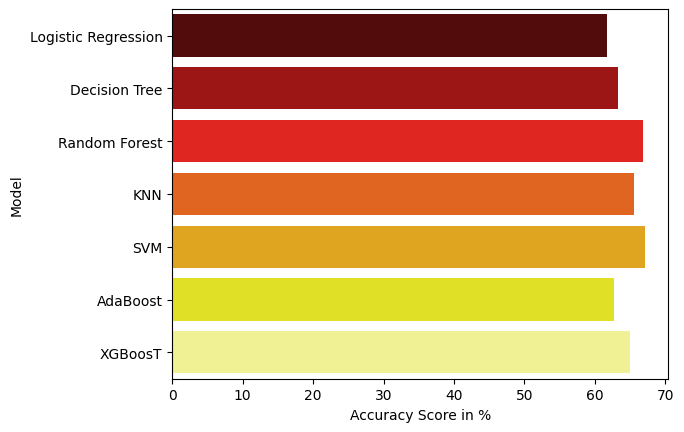

In [ ]:
sns.barplot(x="Accuracy Score in %",y= "Model",data=models,palette='hot')
models.sort_values(by="Accuracy Score in %",ascending= False)
